# Maria Andrukhiv: Data Analytics (R and Python) Final Project

## Part 1: Final Python Code: Webscraping 

My research question is: Do the gender of members of Congress in the years 1989-2021 affect the number of arms the US exported? To answer this question, I utilized webscraping to gather my data on members of Congress. In order to do this, I had to find a website that had this information. I ended up using the US Congress website, www.congress.gov/members, which had a complete list of the members of Congress and the years in which they served. I decided to scrape from the years 1989-2021, as these were some formative years in US policy with the end of the Cold War and the start of the Iraq War/War on Terror. 

1. I began my webscrape my importing the necessary libraries: 

In [1]:
import requests 
import numpy as np
import pandas as pd
import pprint
from bs4 import BeautifulSoup 
from urllib.request import urlopen as uReq

2. I then named my URL as url. I conducted a GET request and named this response as "response". My response was 200, meaning I was able to get access to the URL with no issues. I then created the object soup and named this "congress_soup" to retrieve the HTML of the page. I printed this HTML using prettify so that it was easier to read. This allowed me to better see the correct tags for my webscrape process.  

In [2]:
# the URL I will be scraping is named url 
#url = 'https://www.congress.gov/members?q=%7B%22congress%22%3A%5B%22116%22%5D%7D'
#URL for members of Congress from 1981-2020: 
url = 'https://www.congress.gov/members?pageSize=250&q=%7B%22congress%22%3A%5B%22116%22%2C%22115%22%2C%22114%22%2C%22113%22%2C%22112%22%2C%22111%22%2C%22109%22%2C%22108%22%2C%22107%22%2C%22106%22%2C%22105%22%2C%22104%22%2C%22103%22%2C%22102%22%2C%22101%22%2C%22110%22%5D%7D'
#conduct a GET request and print the respnse 
response = requests.get(url)
#the respionse is 200, meaning I have access to this URL
print(response)

#create the object soup and retreive the HTML text of the page 
congress_soup = BeautifulSoup(response.text, 'html') #we're going to read the information we got with beautiful soup

#pring this HTML using prettify so that the source code is easy to read
#I left this as a comment so that it's easy to read

#print(congress_soup.prettify())

<Response [200]>


3. Next, it was time to scrape. I started out my intializing the variable page to start at 1 and created an empty list called "congress". The information I scrape will go into this list. I scraped through 8 pages of information using a while loop. In this loop, I set the URL and used {page} at the end of the URL to loop through all the pages of information. I then created a get request once again and created a BeautifulSoup variable called "congress_soup"in HTML format. Next, I created the variable 'name' and used the select function to select the name of the congress person. This information was stored in a span tag called 'result-heading' (I know this by inspecting the website). 

>Next, I created a for loop inside of this while loop. This for loop was set to scrape through each "name" variable that I just created. I created the variable 'name_string' which used the get_text function to get the name of each congress person and get rid of any extra code that was present in the output. I then wanted to get the information of the year that each person served. I did this using the select function once again. The years were stored in a ul tag called 'member-served'. I named this variable year_served. I once again used get_text to get the text itself and used the strip() function to remove any extra characters. I then saved this information into a dataframe called 'data'. I then used the append function to append this information into the list called congress that I previously made. 

Outside of the for loop but in the while loop, I made it so that after the for loop ran for one page it went to the next. My while loop stopped once the 8th page was reached. 

In [3]:
#initializing the variable page to start at 1
page = 1
#creating an empty list called congress
congress = []

#here I created a nested while loop to scrape thorugh all 7 pages
while page != 8:
#set the url, at the end I used {page} to loop through all the pages
    url = f"https://www.congress.gov/members?pageSize=250&q=%7B%22congress%22%3A%5B%22116%22%2C%22115%22%2C%22114%22%2C%22113%22%2C%22112%22%2C%22111%22%2C%22109%22%2C%22108%22%2C%22107%22%2C%22106%22%2C%22105%22%2C%22104%22%2C%22103%22%2C%22102%22%2C%22101%22%2C%22110%22%5D%7D&page={page}"
#using a GET request named response   
    response = requests.get(url)
#creating a BeautifulSoup variable named congress_soup
    congress_soup = BeautifulSoup(response.text, 'html')  
#creating the variable name 
    name = congress_soup.select('span.result-heading')
#creating a for loop to scrape through the variable name 
    for index in range(len(name)):
#getting the next out of the variable name
        name_string = name[index].get_text()
#selecting the years that the congress person served 
        year_served = congress_soup.select('ul.member-served')
#removing extra HTML tags and stripping any extra characters
        year_served_string=year_served[index].get_text()
        year_served_string.strip()
#saving this information into a dataframe 
        data = {'name': name_string,
            'year_served': year_served_string.strip()}
#appending this information into the empty list congress
        congress.append(data)
#once this is done, move to the next page
    page = page + 1
#print this list once done, commenting this out so its easier to read
#congress

3. Yay! I actually webscraped 🥳🥳🥳. Next I saved this list into a dataframe called congress_data. I dropped any duplicate values and reset the index. 

In [4]:
#creating a dataframe called congress_data, dropping duplicate values (because each name and year was appended twice) and resetting the index
congress_data=pd.DataFrame(congress).drop_duplicates().reset_index()
#print this dataframe 
congress_data

,index,name,year_served
0,0,"Representative Abercrombie, Neil","House: 1985-1987, 1991-2011"
1,2,"Representative Abraham, Ralph Lee",House: 2015-2021
2,4,"Senator Abraham, Spencer",Senate: 1995-2001
3,6,"Resident Commissioner Acevedo-Vila, Anibal",House: 2001-2005
4,8,"Representative Ackerman, Gary L.",House: 1983-2013
...,...,...,...
1727,3454,"Senator Young, Todd",Senate: 2017-Present House: 2011-2017
1728,3456,"Representative Zeldin, Lee M.",House: 2015-Present
1729,3458,"Representative Zeliff, William H., Jr.",House: 1991-1997
1730,3460,"Representative Zimmer, Dick",House: 1991-1997


## Part 2: Cleaning the Data

Now it is time to clean this dataset and create some new variables so that I am able to run a regression. 

First, I needed to remove the "House" and "Senate" words from my year column, and put these values into their own column called "Body". I did this by using the str.split function, as outlined below: 

In [6]:
#splitting the year_served column, putting this into a new dataframe called 'new'
new = congress_data["year_served"].str.split(" ", n = 1, expand = True)

# making separate body column from new data frame
congress_data["Body"]= new[0]
  
# making separate year served column from new data frame
congress_data["YearsServed"]= new[1] 

#delete the old year_served column
del congress_data['year_served']

#printing 
congress_data

#source: https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/

,index,name,Body,YearsServed
0,0,"Representative Abercrombie, Neil",House:,"1985-1987, 1991-2011"
1,2,"Representative Abraham, Ralph Lee",House:,2015-2021
2,4,"Senator Abraham, Spencer",Senate:,1995-2001
3,6,"Resident Commissioner Acevedo-Vila, Anibal",House:,2001-2005
4,8,"Representative Ackerman, Gary L.",House:,1983-2013
...,...,...,...,...
1727,3454,"Senator Young, Todd",Senate:,2017-Present House: 2011-2017
1728,3456,"Representative Zeldin, Lee M.",House:,2015-Present
1729,3458,"Representative Zeliff, William H., Jr.",House:,1991-1997
1730,3460,"Representative Zimmer, Dick",House:,1991-1997


Great, that split most of what I needed. I now split the YearServed column again to just get the years out and remove any extra words. This also created two columns called "First" (The year they started serving) and "Last" (The last year they served): 

In [7]:
#splitting once again
congress_data[['First','Last']]=pd.DataFrame(congress_data.YearsServed.str.split('-',1).tolist())
del congress_data['YearsServed']

congress_data

,index,name,Body,First,Last
0,0,"Representative Abercrombie, Neil",House:,1985,"1987, 1991-2011"
1,2,"Representative Abraham, Ralph Lee",House:,2015,2021
2,4,"Senator Abraham, Spencer",Senate:,1995,2001
3,6,"Resident Commissioner Acevedo-Vila, Anibal",House:,2001,2005
4,8,"Representative Ackerman, Gary L.",House:,1983,2013
...,...,...,...,...,...
1727,3454,"Senator Young, Todd",Senate:,2017,Present House: 2011-2017
1728,3456,"Representative Zeldin, Lee M.",House:,2015,Present
1729,3458,"Representative Zeliff, William H., Jr.",House:,1991,1997
1730,3460,"Representative Zimmer, Dick",House:,1991,1997


Then what I did was extract the last 4 digits of the "Last" column in order to just get the last year they served. I put this information into a new column called "Terminated" and deleted the column called "Last":

In [8]:
#here i am extracting the last 4 characters from the 'last' column to get the last year that they served 
congress_data[['Termindated']]=congress_data['Last'].str.extract('.*(\d{4})', expand = False)
#deleting the Last coliumn
del congress_data['Last']
congress_data

,index,name,Body,First,Termindated
0,0,"Representative Abercrombie, Neil",House:,1985,2011
1,2,"Representative Abraham, Ralph Lee",House:,2015,2021
2,4,"Senator Abraham, Spencer",Senate:,1995,2001
3,6,"Resident Commissioner Acevedo-Vila, Anibal",House:,2001,2005
4,8,"Representative Ackerman, Gary L.",House:,1983,2013
...,...,...,...,...,...
1727,3454,"Senator Young, Todd",Senate:,2017,2017
1728,3456,"Representative Zeldin, Lee M.",House:,2015,NaN
1729,3458,"Representative Zeliff, William H., Jr.",House:,1991,1997
1730,3460,"Representative Zimmer, Dick",House:,1991,1997


If the value came out to NaN, that meant that the person was still serving (the last thing in the column was "Present". This means that every value that came out to NaN needs to be changed to 2021. I did this here using the fillna function: 

In [9]:
#if the value was NaN, make it be the year 2021
congress_data['Terminated'] = congress_data['Termindated'].fillna(2021)
del congress_data['Termindated']
congress_data

,index,name,Body,First,Terminated
0,0,"Representative Abercrombie, Neil",House:,1985,2011
1,2,"Representative Abraham, Ralph Lee",House:,2015,2021
2,4,"Senator Abraham, Spencer",Senate:,1995,2001
3,6,"Resident Commissioner Acevedo-Vila, Anibal",House:,2001,2005
4,8,"Representative Ackerman, Gary L.",House:,1983,2013
...,...,...,...,...,...
1727,3454,"Senator Young, Todd",Senate:,2017,2017
1728,3456,"Representative Zeldin, Lee M.",House:,2015,2021
1729,3458,"Representative Zeliff, William H., Jr.",House:,1991,1997
1730,3460,"Representative Zimmer, Dick",House:,1991,1997


Next, I needed to remove the colon from the "Body" column. I did this here:

In [10]:
#removing the : from the House/Senate values
#source: https://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column/22238380
congress_data['Body'] = congress_data['Body'].map(lambda x: x.lstrip('+-').rstrip(':'))
congress_data

,index,name,Body,First,Terminated
0,0,"Representative Abercrombie, Neil",House,1985,2011
1,2,"Representative Abraham, Ralph Lee",House,2015,2021
2,4,"Senator Abraham, Spencer",Senate,1995,2001
3,6,"Resident Commissioner Acevedo-Vila, Anibal",House,2001,2005
4,8,"Representative Ackerman, Gary L.",House,1983,2013
...,...,...,...,...,...
1727,3454,"Senator Young, Todd",Senate,2017,2017
1728,3456,"Representative Zeldin, Lee M.",House,2015,2021
1729,3458,"Representative Zeliff, William H., Jr.",House,1991,1997
1730,3460,"Representative Zimmer, Dick",House,1991,1997


Now, in order to get an accurate gender estimate, I need to extract just the first name of each congress person. I split the 'name' column into two. I created a new column called 'Title' where the person's title will go (Rep or Senator). I did this below: 

In [11]:
#splitting the name column
new = congress_data["name"].str.split(" ", n = 1, expand = True)

# making separate Title column from new data frame
congress_data["Title"]= new[0]
  
# making separate name column from new data frame
congress_data["Name"]= new[1] 

del congress_data['name']

congress_data


,index,Body,First,Terminated,Title,Name
0,0,House,1985,2011,Representative,"Abercrombie, Neil"
1,2,House,2015,2021,Representative,"Abraham, Ralph Lee"
2,4,Senate,1995,2001,Senator,"Abraham, Spencer"
3,6,House,2001,2005,Resident,"Commissioner Acevedo-Vila, Anibal"
4,8,House,1983,2013,Representative,"Ackerman, Gary L."
...,...,...,...,...,...,...
1727,3454,Senate,2017,2017,Senator,"Young, Todd"
1728,3456,House,2015,2021,Representative,"Zeldin, Lee M."
1729,3458,House,1991,1997,Representative,"Zeliff, William H., Jr."
1730,3460,House,1991,1997,Representative,"Zimmer, Dick"


Next I split the name column one more time to get the first name out: 

In [12]:
#splitting the name column 
new = congress_data["Name"].str.split(" ", n = 1, expand = True)

# making separate last name column from new data frame
congress_data["Last Name"]= new[0]
  
# making separate first name column from new data frame
congress_data["First Name"]= new[1] 

del congress_data['Name']
congress_data

,index,Body,First,Terminated,Title,Last Name,First Name
0,0,House,1985,2011,Representative,"Abercrombie,",Neil
1,2,House,2015,2021,Representative,"Abraham,",Ralph Lee
2,4,Senate,1995,2001,Senator,"Abraham,",Spencer
3,6,House,2001,2005,Resident,Commissioner,"Acevedo-Vila, Anibal"
4,8,House,1983,2013,Representative,"Ackerman,",Gary L.
...,...,...,...,...,...,...,...
1727,3454,Senate,2017,2017,Senator,"Young,",Todd
1728,3456,House,2015,2021,Representative,"Zeldin,",Lee M.
1729,3458,House,1991,1997,Representative,"Zeliff,","William H., Jr."
1730,3460,House,1991,1997,Representative,"Zimmer,",Dick


I then stripped all the commas and extra characters from the name columns:

In [13]:
#stripping the extra commas out of the name columns 
congress_data['Last Name'] = congress_data['Last Name'].map(lambda x: x.lstrip('+-').rstrip(','))
congress_data['FirstName'] = congress_data['First Name'].map(lambda x: x.lstrip('+-').rstrip(','))

congress_data

,index,Body,First,Terminated,Title,Last Name,First Name,FirstName
0,0,House,1985,2011,Representative,Abercrombie,Neil,Neil
1,2,House,2015,2021,Representative,Abraham,Ralph Lee,Ralph Lee
2,4,Senate,1995,2001,Senator,Abraham,Spencer,Spencer
3,6,House,2001,2005,Resident,Commissioner,"Acevedo-Vila, Anibal","Acevedo-Vila, Anibal"
4,8,House,1983,2013,Representative,Ackerman,Gary L.,Gary L.
...,...,...,...,...,...,...,...,...
1727,3454,Senate,2017,2017,Senator,Young,Todd,Todd
1728,3456,House,2015,2021,Representative,Zeldin,Lee M.,Lee M.
1729,3458,House,1991,1997,Representative,Zeliff,"William H., Jr.","William H., Jr."
1730,3460,House,1991,1997,Representative,Zimmer,Dick,Dick


#### Then, I split the First Name column again to get just the first name. 

In [14]:
#splitting to get just the first name 
congress_data['First Name'] = congress_data.FirstName.str.split(' ', expand = True)[0]


congress_data

,index,Body,First,Terminated,Title,Last Name,First Name,FirstName
0,0,House,1985,2011,Representative,Abercrombie,Neil,Neil
1,2,House,2015,2021,Representative,Abraham,Ralph,Ralph Lee
2,4,Senate,1995,2001,Senator,Abraham,Spencer,Spencer
3,6,House,2001,2005,Resident,Commissioner,"Acevedo-Vila,","Acevedo-Vila, Anibal"
4,8,House,1983,2013,Representative,Ackerman,Gary,Gary L.
...,...,...,...,...,...,...,...,...
1727,3454,Senate,2017,2017,Senator,Young,Todd,Todd
1728,3456,House,2015,2021,Representative,Zeldin,Lee,Lee M.
1729,3458,House,1991,1997,Representative,Zeliff,William,"William H., Jr."
1730,3460,House,1991,1997,Representative,Zimmer,Dick,Dick


#### Then, I dropped the FirstName column

In [15]:
#drop FirstName column
congress_data.drop('FirstName', inplace=True, axis=1)
congress_data

,index,Body,First,Terminated,Title,Last Name,First Name
0,0,House,1985,2011,Representative,Abercrombie,Neil
1,2,House,2015,2021,Representative,Abraham,Ralph
2,4,Senate,1995,2001,Senator,Abraham,Spencer
3,6,House,2001,2005,Resident,Commissioner,"Acevedo-Vila,"
4,8,House,1983,2013,Representative,Ackerman,Gary
...,...,...,...,...,...,...,...
1727,3454,Senate,2017,2017,Senator,Young,Todd
1728,3456,House,2015,2021,Representative,Zeldin,Lee
1729,3458,House,1991,1997,Representative,Zeliff,William
1730,3460,House,1991,1997,Representative,Zimmer,Dick


#### Once again, I removed the commas from First Name:

In [16]:
#remove extra commas
congress_data['First Name'] = congress_data['First Name'].map(lambda x: x.lstrip('+-').rstrip(','))
congress_data

,index,Body,First,Terminated,Title,Last Name,First Name
0,0,House,1985,2011,Representative,Abercrombie,Neil
1,2,House,2015,2021,Representative,Abraham,Ralph
2,4,Senate,1995,2001,Senator,Abraham,Spencer
3,6,House,2001,2005,Resident,Commissioner,Acevedo-Vila
4,8,House,1983,2013,Representative,Ackerman,Gary
...,...,...,...,...,...,...,...
1727,3454,Senate,2017,2017,Senator,Young,Todd
1728,3456,House,2015,2021,Representative,Zeldin,Lee
1729,3458,House,1991,1997,Representative,Zeliff,William
1730,3460,House,1991,1997,Representative,Zimmer,Dick


#### Okay, finally done with that part of the cleaning.


### Now it's time to use Gender Guesser. I started by installing the package: 

In [18]:
#source: https://pypi.org/project/gender-guesser/
#installing a package that guesses the gender of names 
!pip install gender-guesser

import gender_guesser.detector as gender
d = gender.Detector(case_sensitive=False)


#### Here is me using this package. I wanted it to guess the gender of the first names and append this to the dataframe congress_data

In [19]:
#add the results of the gender guesser 

gender=[]
for i in congress_data['First Name']:
    gender.append(d.get_gender(i))

#add the gender list as a column in the dataframe 
congress_data['Gender'] = gender
congress_data

,Unnamed: 0,index,Body,First,Terminated,Title,Last Name,First Name,Gender
0,0,0,House,1985,2011,Representative,Abercrombie,Neil,male
1,1,2,House,2015,2021,Representative,Abraham,Ralph,male
2,2,4,Senate,1995,2001,Senator,Abraham,Spencer,male
3,3,6,House,2001,2005,Resident,Commissioner,Acevedo-Vila,unknown
4,4,8,House,1983,2013,Representative,Ackerman,Gary,male
...,...,...,...,...,...,...,...,...,...
1727,1727,3454,Senate,2017,2017,Senator,Young,Todd,male
1728,1728,3456,House,2015,2021,Representative,Zeldin,Lee,mostly_male
1729,1729,3458,House,1991,1997,Representative,Zeliff,William,male
1730,1730,3460,House,1991,1997,Representative,Zimmer,Dick,male


#### As you can see, some of the values come out to mostly_male/female or andy. I replaced these values with just male, unknown or female for the purpose of my regression:

In [20]:
#Replace the mostly_male, mostly_female, andy values in the Gender column
#source: https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python#:~:text=Access%20a%20specific%20pandas.,old%20values%20to%20new%20values.
congress_data["Gender"].replace({"mostly_male": "male", "mostly_female": "female", "andy" : "unknown"}, inplace=True)
congress_data

,Unnamed: 0,index,Body,First,Terminated,Title,Last Name,First Name,Gender
0,0,0,House,1985,2011,Representative,Abercrombie,Neil,male
1,1,2,House,2015,2021,Representative,Abraham,Ralph,male
2,2,4,Senate,1995,2001,Senator,Abraham,Spencer,male
3,3,6,House,2001,2005,Resident,Commissioner,Acevedo-Vila,unknown
4,4,8,House,1983,2013,Representative,Ackerman,Gary,male
...,...,...,...,...,...,...,...,...,...
1727,1727,3454,Senate,2017,2017,Senator,Young,Todd,male
1728,1728,3456,House,2015,2021,Representative,Zeldin,Lee,male
1729,1729,3458,House,1991,1997,Representative,Zeliff,William,male
1730,1730,3460,House,1991,1997,Representative,Zimmer,Dick,male


#### Next, I dropped the index column because it was not aligned with my values. I renamed the Unnamed:0 column to index instead: 

In [21]:
#dropping the index column 
congress_data.drop('index', inplace=True, axis=1)
#renaming unnamed to index
congress_data = congress_data.rename(columns={'Unnamed: 0': 'index'})
congress_data

,index,Body,First,Terminated,Title,Last Name,First Name,Gender
0,0,House,1985,2011,Representative,Abercrombie,Neil,male
1,1,House,2015,2021,Representative,Abraham,Ralph,male
2,2,Senate,1995,2001,Senator,Abraham,Spencer,male
3,3,House,2001,2005,Resident,Commissioner,Acevedo-Vila,unknown
4,4,House,1983,2013,Representative,Ackerman,Gary,male
...,...,...,...,...,...,...,...,...
1727,1727,Senate,2017,2017,Senator,Young,Todd,male
1728,1728,House,2015,2021,Representative,Zeldin,Lee,male
1729,1729,House,1991,1997,Representative,Zeliff,William,male
1730,1730,House,1991,1997,Representative,Zimmer,Dick,male


#### Next, I created a row called total_time to calculate the total time that each person served: 

In [22]:
#subtracting the year they terminated from the first year they served
congress_data['total_time'] = congress_data['Terminated'] - congress_data['First']
congress_data

,index,Body,First,Terminated,Title,Last Name,First Name,Gender,total_time
0,0,House,1985,2011,Representative,Abercrombie,Neil,male,26
1,1,House,2015,2021,Representative,Abraham,Ralph,male,6
2,2,Senate,1995,2001,Senator,Abraham,Spencer,male,6
3,3,House,2001,2005,Resident,Commissioner,Acevedo-Vila,unknown,4
4,4,House,1983,2013,Representative,Ackerman,Gary,male,30
...,...,...,...,...,...,...,...,...,...
1727,1727,Senate,2017,2017,Senator,Young,Todd,male,0
1728,1728,House,2015,2021,Representative,Zeldin,Lee,male,6
1729,1729,House,1991,1997,Representative,Zeliff,William,male,6
1730,1730,House,1991,1997,Representative,Zimmer,Dick,male,6


#### If this value came out to 0, it means the person has only served for 1 year. So I replaced 0 with 1: 

In [23]:
#replace all zeros with 1 in the total_time column
congress_data["total_time"].replace({0: 1}, inplace=True)
congress_data

,index,Body,First,Terminated,Title,Last Name,First Name,Gender,total_time
0,0,House,1985,2011,Representative,Abercrombie,Neil,male,26
1,1,House,2015,2021,Representative,Abraham,Ralph,male,6
2,2,Senate,1995,2001,Senator,Abraham,Spencer,male,6
3,3,House,2001,2005,Resident,Commissioner,Acevedo-Vila,unknown,4
4,4,House,1983,2013,Representative,Ackerman,Gary,male,30
...,...,...,...,...,...,...,...,...,...
1727,1727,Senate,2017,2017,Senator,Young,Todd,male,1
1728,1728,House,2015,2021,Representative,Zeldin,Lee,male,6
1729,1729,House,1991,1997,Representative,Zeliff,William,male,6
1730,1730,House,1991,1997,Representative,Zimmer,Dick,male,6


#### Next, the time service variable was created. This variable selects the first year between 1989 and 2021 that the person served

In [40]:

for i,j in zip(range(1989,2026,1),range(1994,2026,1)):
    congress_data['time_service'] = np.where((congress_data['First'] >= i) & (congress_data['First'] <j), i, congress_data['First'])


In [41]:
congress_data


,index,Body,First,Terminated,Title,Last Name,First Name,Gender,total_time,time_service
0,0,House,1985,2011,Representative,Abercrombie,Neil,male,26,1985
1,1,House,2015,2021,Representative,Abraham,Ralph,male,6,2015
2,2,Senate,1995,2001,Senator,Abraham,Spencer,male,6,1995
3,3,House,2001,2005,Resident,Commissioner,Acevedo-Vila,unknown,4,2001
4,4,House,1983,2013,Representative,Ackerman,Gary,male,30,1983
...,...,...,...,...,...,...,...,...,...,...
1727,1727,Senate,2017,2017,Senator,Young,Todd,male,1,2017
1728,1728,House,2015,2021,Representative,Zeldin,Lee,male,6,2015
1729,1729,House,1991,1997,Representative,Zeliff,William,male,6,1991
1730,1730,House,1991,1997,Representative,Zimmer,Dick,male,6,1991


Next, I created a column that counts the total amount of women

In [45]:
congress_data['total_women']=congress_data['Gender'].value_counts()['female']

Here, I am creating a column that counts the total number of women by the time service variable:

In [46]:
#counting the number of women by time service 
count_women=congress_data.groupby(['Gender', 'time_service']).count().reset_index()
#creating a column in my dataframe:
congress_data['number_women']=count_women['total_women']
#this column puts the time service variable in order: 
congress_data['time_service_order']=count_women['time_service']
#then I am renaming the time_service_order variable as year so it can be merged with my other data
congress_data.rename(columns={'time_service_order':'year'}, inplace=True)


Here I am creating a variable that is the ratio of women to total people:

In [49]:
#create the variable total which counts the total people serving by time_service
total=congress_data.groupby(['time_service']).count().reset_index()
#create a column called total_people using index 
congress_data['total_people']=total['index']
#calculate the ratio of women serving in that year 
congress_data['women_ratio'] = congress_data['number_women']/congress_data['total_people']

#### Here I am saving this dataframe to a CSV file: 


In [42]:
#save this dataframe to a csv file 
congress_data.to_csv('congress_data.csv')
congress_data=pd.read_csv('congress_data.csv')

Next, I am creating a new dataframe with just the information I need for my regression so that it can be more easily merged with the other data that I gathered from World Bank:

In [50]:
#copy these columns into a new df 
new_congress_data = congress_data[['number_women', 'year', 'total_people','women_ratio']].copy()
#drop any NaN columns 
new_congress_data.dropna()
#drop any duplicates 
new_congress_data.drop_duplicates(subset='year')
new_congress_data.sort_values('year')
#save this to a csv file 
new_congress_data.to_csv('new_congress_datafinal.csv')

#### Next, I am merging the two CSV file. One is the CSV file with the information that I scraped and one is from information that I got from the World Bank

In [55]:
#setting the working directory: 
path = '/Users/mariaandrukhiv/Documents/GitHub/assignment-2-get-data-mariaandrukhiv/'

#naming each csv file as a variable and converting them to pandas 
df1 = pd.read_csv('new_congress_datafinal.csv')
df2 = pd.read_csv(path+'TransposedCSVforDataAnalysis.csv')
  
#using merge function by setting how='outer' to combine them
df1.merge(df2,on='year')

#saving this combined df to a new csv file
output4.to_csv('fulldataset.csv')

,Unnamed: 0,number_women,year,total_people,women_ratio,Arms exports (SIPRI trend indicator values),Military expenditure (% of GDP),Arms imports (SIPRI trend indicator values),GDP per capita (constant 2015 US$),index
0,10,8.0,1989.0,10.0,0.800000,11319000000,5.871206,1784000000,38989.49367,0
1,53,41.0,1989.0,NaN,NaN,11319000000,5.871206,1784000000,38989.49367,0
2,97,3.0,1989.0,NaN,NaN,11319000000,5.871206,1784000000,38989.49367,0
3,11,6.0,1991.0,14.0,0.428571,12475000000,4.883429,520000000,38715.26169,2
4,55,46.0,1991.0,NaN,NaN,12475000000,4.883429,520000000,38715.26169,2
...,...,...,...,...,...,...,...,...,...,...
66,67,1.0,2006.0,NaN,NaN,7545000000,4.041627,646000000,53782.29729,17
67,71,10.0,2010.0,NaN,NaN,8062000000,4.922642,1091000000,52759.99808,21
68,110,1.0,2010.0,NaN,NaN,8062000000,4.922642,1091000000,52759.99808,21
69,77,3.0,2016.0,NaN,NaN,9868000000,3.418942,451000000,57418.93385,27


Okay just being honest...I don't know why my ratio variables are not working now and I am out of time to figure it out. So I am going to be running the regression using the number_women variable. 

## Part 3: Graphs

For my graphs, I created two line graphs and a scatterplot. The code for them is below. 

#### Importing necessary libraries: 

In [56]:
import matplotlib.pyplot as plt 
import pandas as pd

In [57]:
#setting the pathname 
path= '/Users/mariaandrukhiv/Documents/GitHub/assignment-2-get-data-mariaandrukhiv/'
#creating a DataFrame with my CSV file, naming it worldbank
worldbank=pd.read_csv(path+'TransposedCSVforDataAnalysis.csv')
#printing this DF, commented it out so that its easier to read 
#worldbank

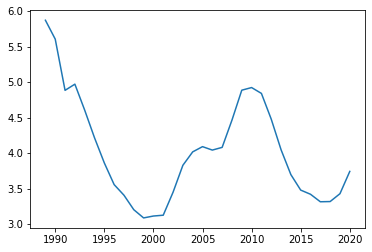

In [59]:
#creating the first line graph 
plt.plot(worldbank['year'],worldbank['Military expenditure (% of GDP)'])


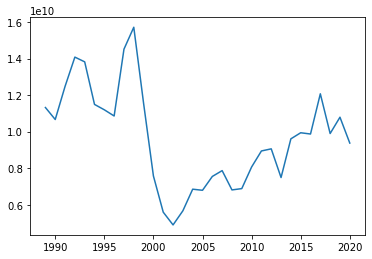

In [60]:
#creating another line graph
plt.plot(worldbank['year'],worldbank['Arms exports (SIPRI trend indicator values)'])

Displaying the graphs side by side in one figure:

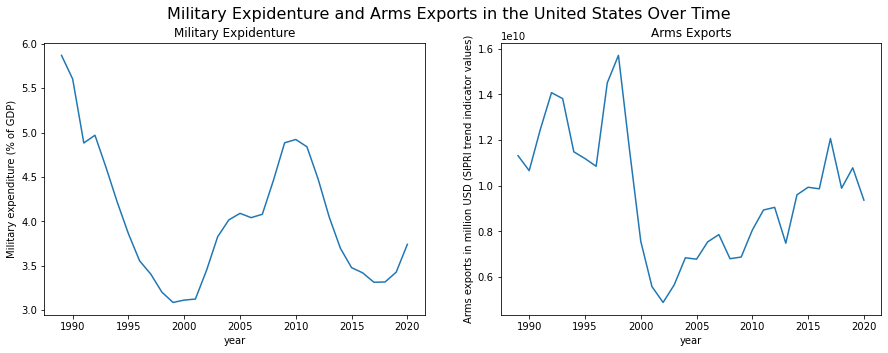

In [61]:


#here, I am setting the size of the overall figure
figure=plt.figure(figsize=(15,5))

#setting the subplot area
ax1 = plt.subplot(1, 2,1)
#assigning index 1 to this graph 
ax1.plot(worldbank['year'],worldbank['Military expenditure (% of GDP)'])
#setting th x and y axis labels
ax1.set_xlabel('year')
ax1.set_ylabel('Military expenditure (% of GDP)')


#setting the other subplot area
ax2 = plt.subplot(1, 2,2)
#assigning index 2 to this graph
ax2.plot(worldbank['year'],worldbank['Arms exports (SIPRI trend indicator values)'])
##setting th x and y axis labels
ax2.set_xlabel('year')
ax2.set_ylabel('Arms exports in million USD (SIPRI trend indicator values)')

#naming the overall figure 
figure.suptitle('Military Expidenture and Arms Exports in the United States Over Time', fontsize=16) 
#naming the ax1 graph
ax1.set_title('Military Expidenture') #<- Title for subfigure 1
#naming the ax2 graph
ax2.set_title('Arms Exports') #<- Title for subfigure 2
plt.savefig('military.png')
#printing this figure
plt.show()

### Interpreting these graphs:

Looking at these graphs, I can see that there is some sort of positive correlation between military expidenture and arms exports. Military expidenture in the US decreased between the years 1990-2000, and subsequently the number of arms exports dramatically decreased. 

Third Graph: 

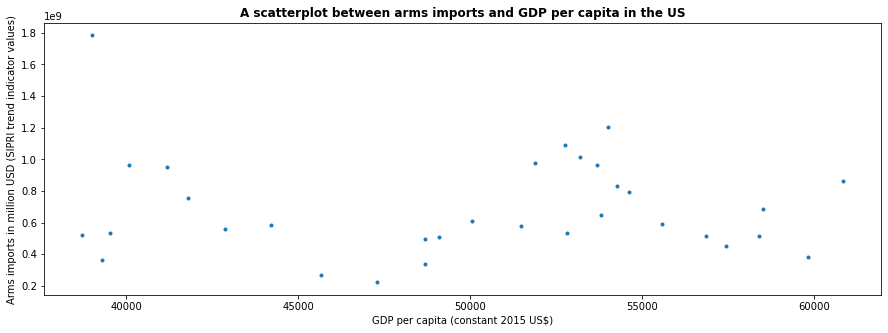

In [62]:
#here, I am setting the size of the overall figure
figure=plt.figure(figsize=(15,5))

#creating a scatter plot 
plt.plot('GDP per capita (constant 2015 US$)','Arms imports (SIPRI trend indicator values)', data=worldbank, linestyle='none', marker='.')

# adding labels
plt.ylabel('Arms imports in million USD (SIPRI trend indicator values)', )
plt.xlabel('GDP per capita (constant 2015 US$)')
plt.title("A scatterplot between arms imports and GDP per capita in the US",fontweight='bold')
plt.savefig('militaryscatter.png')


This graph shows that even as GDP per capita increases, the value of arms imported generally remains between 25 million and 125 million USD (other than a few outliers). 

## Part 4: Regression 
Please see my R notebook for regressions 

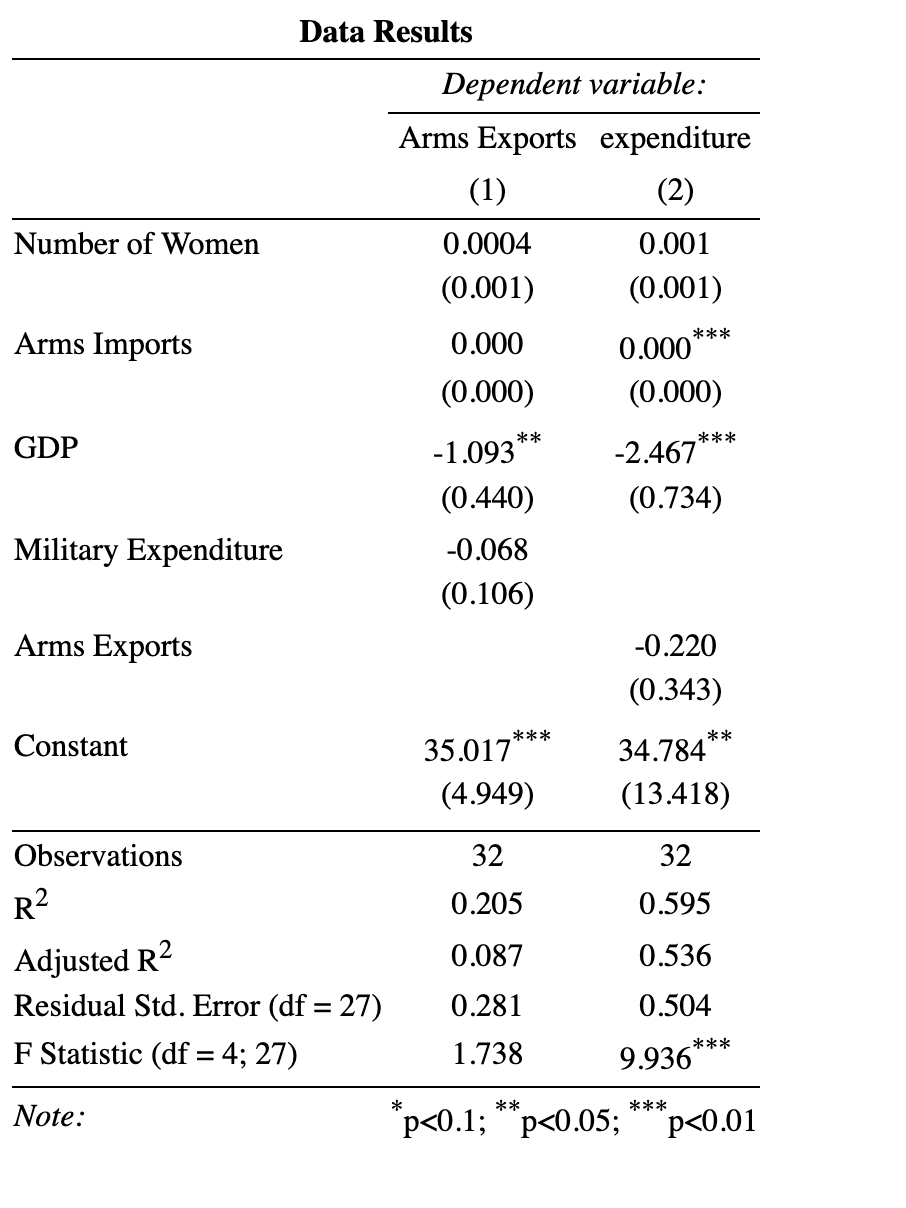

### Regression Analysis:

In my final regressions the number of women serving in Congress was not significant in either of my models. I ran two regressions, one with Arms Exports as the dependent variable and one with Military Expidenture as my dependent variable. I logged GDP and Arms Exports in my regressions. The first regression aimed to analyze the effect of women in Congress on Arms Exports in the US. The coefficient showed that for every increase in a woman serving in congress, arms exports increase by 0.0004%, however as I said before this is not statistically significant. In my second model, for every increase in a women serving military expidenture went up by around $1000. Again this was not significant. 

The only variable that was significant in my Exports model was GDP, which showed that for every 1% increase in GDP per capita, arms exports decreased by 1.093%. This was singificant at the 5% level. In my expenditure model, both arms imports and GDP were significant at the 1%. However, the coefficient on arms exports was 0, meaning that there was a very small or no effect. The GDP variable showed that for every 1% increase in GDP per capita, military expenditure decreases by around 2.5 million dollars. I think that this negative relationship on both mdels is interesting, it could be because as GDP is increasing there may be more political stability, meaning that the US is spending less on the military and exporting less arms. 

My research can be improved a lot of ways. First, I need to calculate the ratio of women to total people serving. It would also be good for me to scrape more years worth of information. I would also adjust the probability of the gender guesser so that I get less unknown results. As I have said before, I would in the future use an API or scrape ambassadors rather than congress people. I would include additional controls, such as controlling for conflict in that year. Overall, a LOT can be done to improve my research and my webscraping skills. The number of women serving variable I created also needs a lot of improvement. However, I feel like I have learned a LOT through this whole process and I hope that as I continue my masters degree I will get better at using R and Python and be able to scrape information more efficiently and create better graphs for analysis. This class has also shown me that I would be interested in working a data analysis or policy analysis job in the future! 

### Me all semester: 
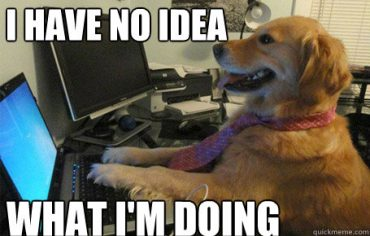